In [ ]:
# a quick messy model

In [66]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv('player_dataset.csv')

In [12]:
df['SALARY']

0      $1,600,000
1      $3,250,000
2      $2,000,000
3      $9,000,000
4      $2,500,000
          ...    
563    $5,050,000
564    $5,825,000
565    $1,050,000
566      $725,000
567    $9,000,000
Name: SALARY, Length: 568, dtype: object

In [13]:
df['SALARY'] = df['SALARY'].map(lambda x: x.replace('$','').replace(',',''))

In [14]:
df['SALARY'] = df['SALARY'].astype(int)

In [17]:
x_tr,x_te,y_tr,y_te = train_test_split(df.select_dtypes(exclude='O').drop('SALARY',axis=1),df['SALARY'])

In [18]:
x_tr,x_te,y_tr,y_te = train_test_split(df.select_dtypes(exclude='O').drop('SALARY',axis=1),df['SALARY'])
lr = LinearRegression()
lr.fit(x_tr,y_tr)
p = lr.predict(x_te)
r2_score(y_te,p)*100

84.40533770173359

In [43]:
coefs= pd.DataFrame([x_tr.columns,lr.coef_]).T
coefs.rename(columns={0:'feature',1:'coef'},inplace=True)
coefs.sort_values(by='coef',ascending=False,inplace=True)

In [49]:
coefs

,feature,coef
9,cap_hit_perc,73016726.426108
4,P/GP,940607.027496
15,Takeaways,20641.259075
12,xGF_perc,19545.142464
14,Giveaways,12063.229595
5,+/-,7689.97955
13,PIM,3470.658248
18,blocked_shots,879.615592
17,Hits Taken,-599.188693
6,Sh,-1101.864564


In [54]:
import seaborn as sns

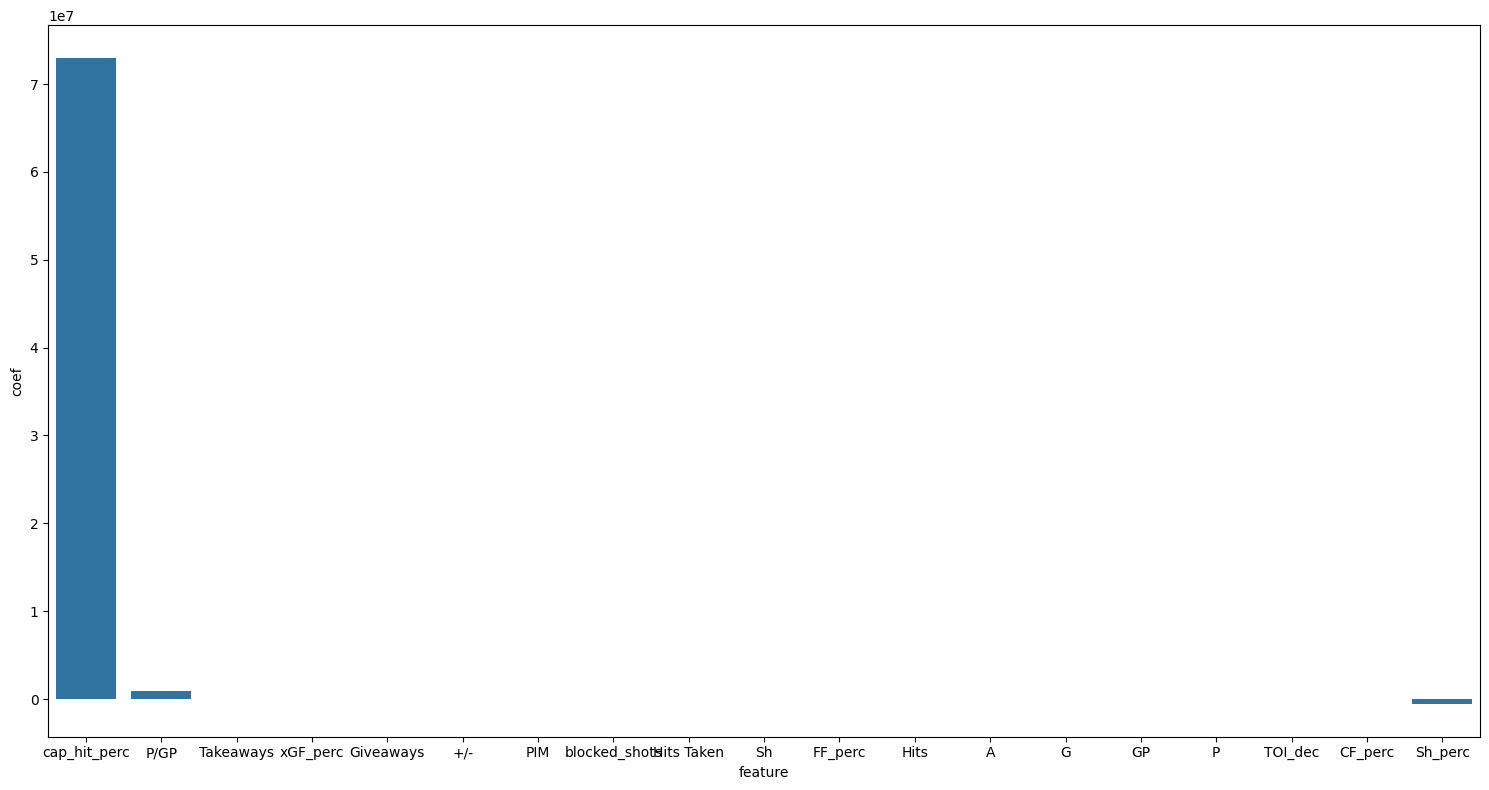

In [68]:
plt.figure(figsize=(15,8))
sns.barplot(x=coefs['feature'],y=coefs['coef'])
plt.tight_layout()